# This project is churn analysis of data of a telecom company

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
df=pd.read_csv('Customer Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [25]:
df['TotalCharges']=df['TotalCharges'].replace(' ',0)
df['TotalCharges']=df['TotalCharges'].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [26]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [27]:
df.duplicated().sum()

np.int64(0)

In [28]:
df['customerID'].duplicated().sum()

np.int64(0)

In [29]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


## converting senior citizen from 0,1 to yes and no

In [62]:
def convert_senior_citizen(value):
    if value == 1:
        return 'yes'
    else:
        return 'no'
    
df['SeniorCitizen']=df['SeniorCitizen'].apply(convert_senior_citizen)
df.head(30)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,no,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,no,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,no,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,no,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,no,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


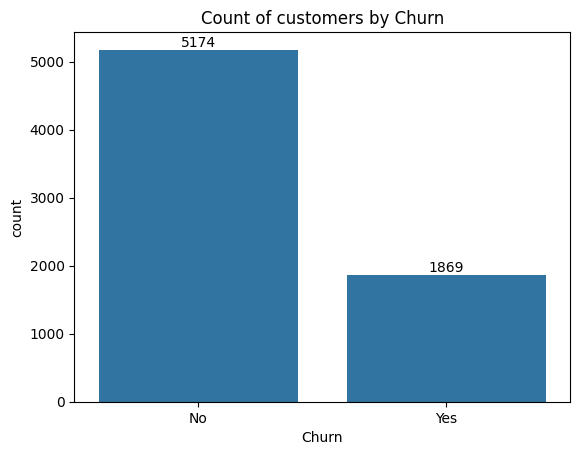

<Figure size 400x400 with 0 Axes>

In [84]:
churn_plot=sns.countplot(data=df,x='Churn')
churn_plot.bar_label(churn_plot.containers[0])
plt.title("Count of customers by Churn")
plt.figure(figsize=(4,4))
plt.show()

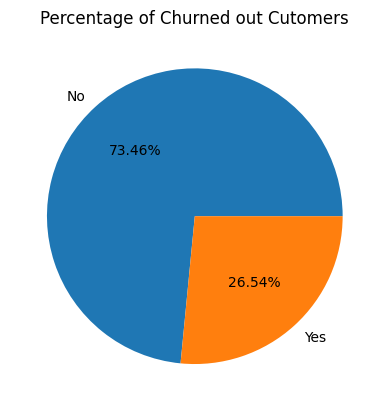

In [44]:
plt.Figure(figsize=(5,5))
gb=df.groupby('Churn').agg({'Churn':'count'})
plt.pie(gb['Churn'],labels=gb.index,autopct='%1.2f%%')
plt.title('Percentage of Churned out Cutomers')
plt.show()


### Through these charts we can conclude that 25.54% of total customers churned out 

#### Now lets find the reason for it

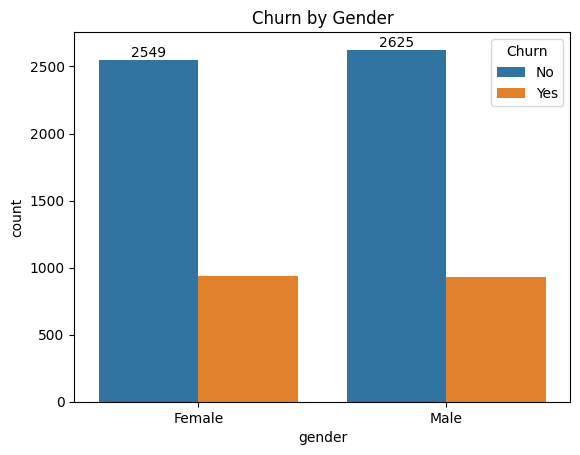

In [55]:
gender_box_plot= sns.countplot(x=df['gender'],hue=df['Churn'])
gender_box_plot.bar_label(gender_box_plot.containers[0])
plt.title('Churn by Gender')
plt.show()

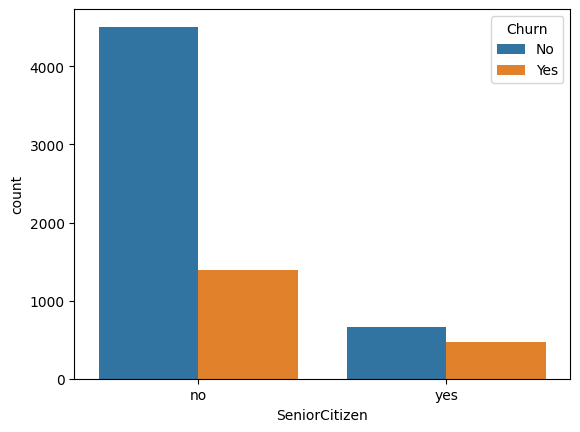

In [64]:
sns.countplot(x=df['SeniorCitizen'],hue=df['Churn'])
plt.show()

### From this figure we can conclude that Senior citizens are more churned as compared to non-senior citizens


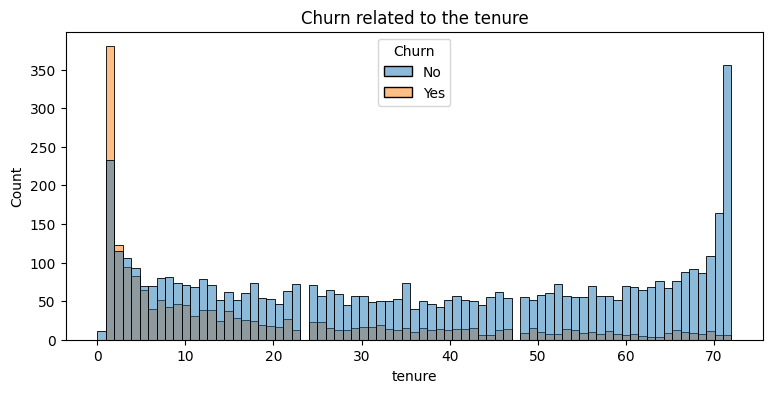

In [85]:
plt.figure(figsize=(9,4))
sns.histplot(data=df,x='tenure',hue='Churn',bins=75)
plt.title('Churn related to the tenure')
plt.show()

## From this figure we can conclude that most people churned out at the starting while who stayed for long time has very low churned out ratio

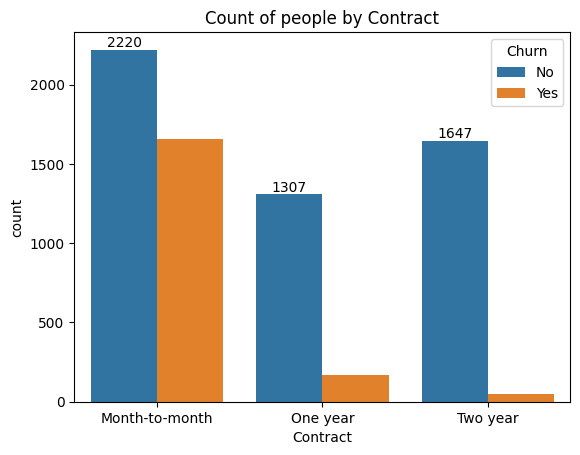

In [72]:
contract_plot=sns.countplot(x=df['Contract'],hue=df['Churn'])
contract_plot.bar_label(contract_plot.containers[0])
plt.title('Count of people by Contract')
plt.show()

## Person who have Month-to-month contract are more likely to churn rather than one or two year contract

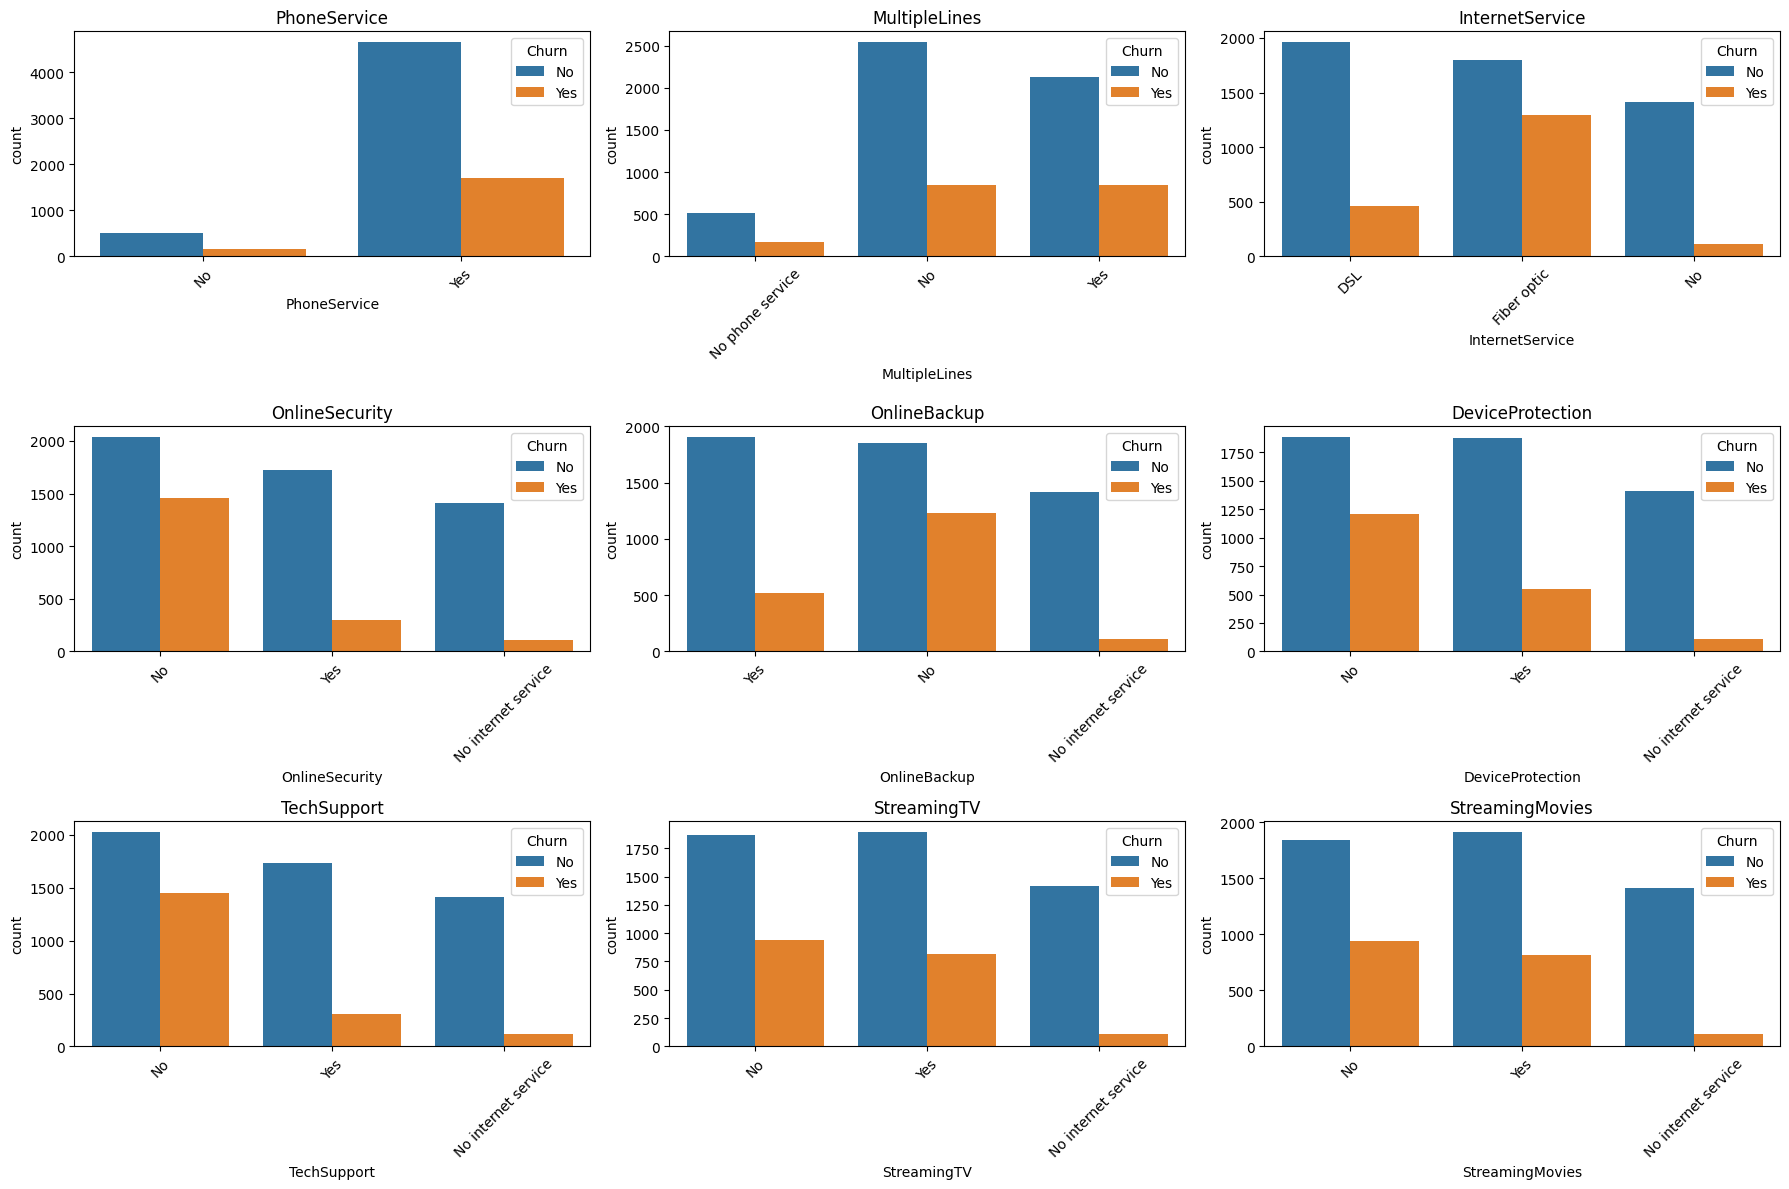

In [ ]:
columns = ['PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection','TechSupport', 'StreamingTV', 'StreamingMovies']
plt.figure(figsize=(18, 12))

for i, col in enumerate(columns, 1):
    plt.subplot(3, 3, i) 
    sns.countplot(data=df, x=col,hue='Churn')
    plt.title(col)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Customers lacking value-added services (like OnlineSecurity, OnlineBackup, DeviceProtection, and TechSupport) show a higher likelihood of churn. Providing or promoting these services may improve retention.

Fiber optic internet users have a notably higher churn rate compared to DSL users, indicating possible dissatisfaction related to cost or performance.

Streaming service users (StreamingTV and StreamingMovies) churn less than non-users, suggesting that entertainment services may enhance customer loyalty.

Customers without PhoneService or MultipleLines tend to churn more, though their proportion is small.

Those with no internet service have low churn, likely due to minimal engagement or fewer service expectations.

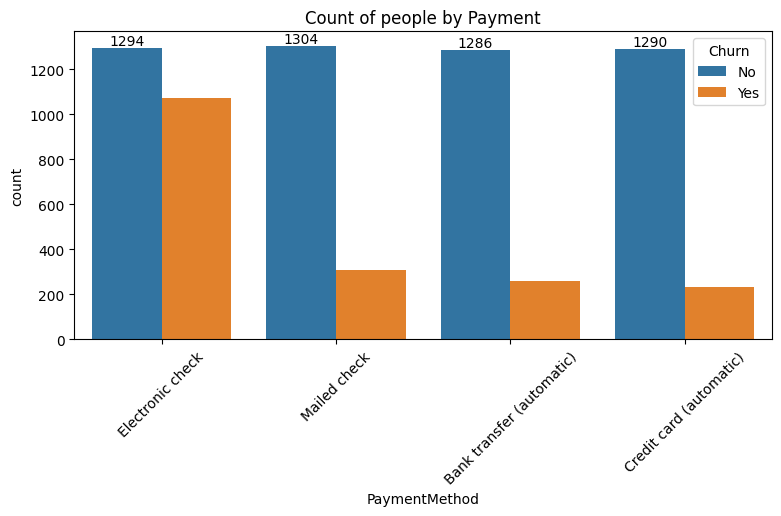

In [81]:
plt.figure(figsize=(9,4))
payment_plot=sns.countplot(x=df['PaymentMethod'],hue=df['Churn'])
payment_plot.bar_label(payment_plot.containers[0])
plt.title('Count of people by Payment')
plt.xticks(rotation=45)
plt.show()

The customers paying through electronic check are more churning than customers using other payment methods